In [46]:
import pandas as pd

health_df = pd.read_csv("../data/ihme_data.csv")

sensor_df = pd.read_csv("../data/openaq_data.csv")
sensor_df.dropna(axis=0, how="all", inplace=True)
sensor_df

,pm25,co,no2,pm1,pm10,o3,so2,country
0,-74.000,NaN,NaN,NaN,NaN,NaN,NaN,DZ
1,6.200,209.000,26.000,NaN,14.700,54.000,1.180,AD
2,6.220,0.391,0.017,4.470,18.650,NaN,NaN,AR
3,2.390,0.171,0.009,4.817,12.513,0.648,0.001,AU
4,9.577,349.000,15.325,15.998,14.879,51.410,1.633,AT
...,...,...,...,...,...,...,...,...
92,42.100,NaN,NaN,NaN,NaN,NaN,NaN,UG
93,21.200,NaN,NaN,17.800,32.000,NaN,NaN,UA
94,6.613,197.143,18.680,13.601,13.290,54.167,2.097,GB
95,13.900,NaN,NaN,NaN,NaN,-0.049,NaN,UZ


In [47]:
df = pd.merge(health_df, sensor_df)

df.sort_values("tuberculosis", inplace=True)
df.set_index("country", inplace=True)

df[df < 0] = None
df[df["tuberculosis"] > 500] = None
df = df.dropna(how="all", subset=["pm1", "pm10", "pm25", "co", "no2", "o3", "so2"])
df

,tuberculosis,hiv,pm25,co,no2,pm1,pm10,o3,so2
country,,,,,,,,,
SM,1.988,0.015,NaN,NaN,4.960,NaN,NaN,65.400,NaN
DK,2.739,0.032,NaN,181.5,7.801,NaN,11.300,58.240,NaN
IS,2.902,0.098,3.318,116.0,5.828,2.053,6.981,20.000,2.418
NL,2.923,0.020,2.882,262.0,NaN,14.130,2.383,48.667,NaN
GR,2.999,0.047,13.377,1270.0,19.817,NaN,27.040,67.180,6.783
...,...,...,...,...,...,...,...,...,...
KE,200.422,0.719,14.200,NaN,NaN,10.900,21.700,NaN,NaN
IN,212.643,0.041,NaN,NaN,NaN,67.500,NaN,NaN,NaN
MG,221.561,0.213,29.100,NaN,NaN,NaN,NaN,NaN,NaN


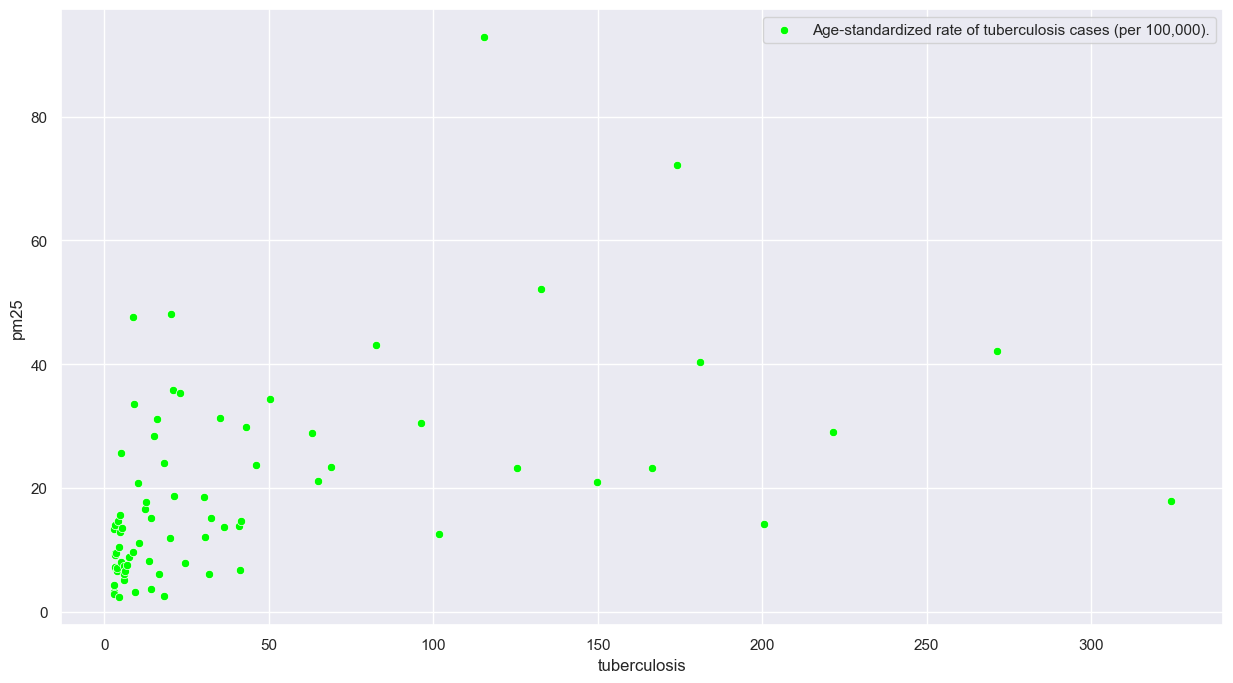

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
plt.figure(figsize=(15, 8))


sns.scatterplot(
    x=df["tuberculosis"], y=df["pm25"], color="lime", label="Age-standardized rate of tuberculosis cases (per 100,000)."
)
plt.show()